In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
val = pd.read_csv('location.csv')
val = val.loc[val['value']<100000]
val = val.loc[val['value']>1]
val.head()

,latitude,longitude,value
0,-32.00871,115.86407,202
1,-32.06806,115.87674,72
2,-29.25216,114.93205,94
3,-32.00395,115.91394,180
4,-34.35542,116.18267,440


In [3]:
x = val["latitude"].values.reshape(-1,1)
y = val["value"].values.reshape(-1, 1)
z = val["longitude"].values.reshape(-1,1)
print(x.shape, y.shape, z.shape)

(12447, 1) (12447, 1) (12447, 1)


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(x_train, y_train)
training_score = model.score(x_train, y_train)
testing_score = model.score(x_test, y_test)

In [12]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.000501253133372348
Testing Score: 0.000651544011335714


Text(0.5, 1.0, 'Location vs Value Plot')

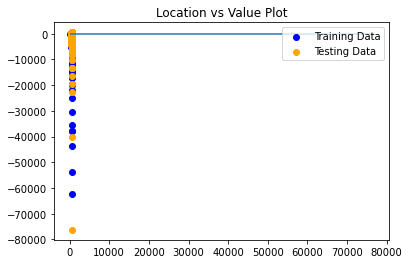

In [13]:
plt.scatter(model.predict(x_train), model.predict(x_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Location vs Value Plot")